# Условия и уравнения

Вариант 15

## Условия

$u'' - u' - u = 3\sin(x) - \cos(x)$

$u'(0) = -1$

$u(1) + 2u'(1) = -(\cos(1) + 3\sin(1))$

$u(x) = \cos(x) - \sin(x)$

## Уравнения

$\phi_0(x) = \dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3$

$\phi_0'(x) = \dfrac 3 2 \cdot x - 1$

$\phi_0''(x) = \dfrac 3 2$

----

$\phi_k(x) = \left(1 - x\right)^{2} \cdot x^{k + 1}$

$\phi_k'(x) = {x}^{k}\,\left(\left(k+3\right)\,{x}^{2}+\left(-2\,k-4\right)\,x+k+1\right)$

$\phi_k''(x) = {x}^{k-1}\,\left(\left({k}^{2}+5\,k+6\right)\,{x}^{2}+\left(-2\,{k}^{2}-6\,k-4\right)\,x+{k}^{2}+k\right)$

In [10]:
def phi_0(x):
    return 3/4 * x ** 2 - x - cos(1) - 3 * sin(1) + 3

In [11]:
def phi_0s(x):
    return 3/2 * x - 1

In [12]:
phi_0(0), phi_0(1)

(np.float64(-0.06471526029182906), np.float64(-0.31471526029182906))

In [13]:
phi_0s(0)

-1.0

$p(x) = e^{-x}$

$q(x) = -e^{-x}$

$f(x) = e^{-x} \cdot \left(3\sin(x) - \cos(x)\right) $

$a = 0$

$b = 1$

$n = 2$

$$
\sum \limits_{k = 1}^2 \left( C_k \cdot {x}^{k}\,\left(\left(k+3\right)\,{x}^{2}+\left(-2\,k-4\right)\,x+k+1\right) \right)
$$

$$
k_1: \quad C_1 \cdot \left[4x^3 -6x^2 + 2x\right]
$$

$$
k_2: \quad C_2 \cdot \left[5x^4 -8x^3 + 3x^2\right]
$$

$$
k_s: \quad C_1 \cdot \left[4x^3 -6x^2 + 2x\right] + C_2 \cdot \left[5x^4 -8x^3 + 3x^2\right]
$$

$$
J[u] = \int \limits_0^1 \left\{ e^{-x} \cdot\left[ \dfrac 3 2 \cdot x - 1 + k_s \right]^2 + e^{-x} \left[\dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3 + k_s \right]^2 + 2e^{-x}\cdot\left(3\sin(x) - \cos(x)\right) \cdot \left[ \dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3 + k_s \right] \right\} dx = 
$$
$$
= \Phi\left(C_1, C_2\right)
$$

$$
J[u] = \int \limits_0^1 e^{-x} \cdot \left\{ \left[ \dfrac 3 2 \cdot x - 1 + k_s \right]^2 + \left[\dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3 + k_s \right]^2 + 2\cdot\left(3\sin(x) - \cos(x)\right) \cdot \left[ \dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3 + k_s \right] \right\} dx = 
$$
$$
= \Phi\left(C_1, C_2\right)
$$

$$
\dfrac{\partial J[u]}{\partial C_1} = \int \limits_0^1 e^{-x} \cdot \left\{ 2C_1 \cdot \left[4x^3 - 6x^2 + 2x\right]^2 + 2C_2\left[4x^3 - 6x^2 + 2x\right] \left[5x^4 - 8x^3 + 3x^2\right] + \left(6\sin(x) - 2\cos(x) \right) \cdot \left[8x^3 - 12x^2 + 4x\right] \right\} = 0
$$

$$
\dfrac{\partial J[u]}{\partial C_1} = 0.02407C_{1} + 0.01105C_{2} -0.2168 = 0
$$

$$
\dfrac{\partial J[u]}{\partial C_2} = \int\limits_0^1 e^{-x} \cdot \left\{ 2C_1 \left[4x^3 - 6x^2 + 2x\right]\left[5x^4 - 8x^3 + 3x^2\right] + 2C_2 \left[5x^4 - 8x^3 + 3x^2\right]^2 + \left(6\sin(x) - 2\cos(x)\right)\left[10x^4 - 16x^3 + 6x^2\right] \right\}
$$

$$
\dfrac{\partial J[u]}{\partial C_2} = 0.01105C_1 + 0.00702C_2 - 0.0903606 = 0
$$

$$
\begin{cases}
0.02407C_{1} + 0.01105C_{2} -0.2168 = 0 \\
0.01105C_1 + 0.00702C_2 - 0.0903606 = 0
\end{cases}
$$

$$
\left\{\begin{gathered}C_1=-\dfrac{4026549}{8092720} = -0.497551997351\\C_2=\dfrac{10890710179}{526026800} = 20.7037173372\end{gathered}\right.
$$

$$
u(x) = \dfrac 3 4 \cdot x^2 - x - \cos(1) - 3\sin(1) + 3 + C_1 \cdot \left[4x^3 -6x^2 + 2x\right] + C_2 \cdot \left[5x^4 -8x^3 + 3x^2\right]
$$

# Imports

In [14]:
import numpy as np
from numpy import cos, sin

In [15]:
import matplotlib.pyplot as plt

In [16]:
C1 = -0.497551997351

In [17]:
C2 = 20.7037173372

In [18]:
def u(x):
    return (
        3 / 4 * pow(x, 2)
        - x
        - cos(1)
        - 3 * sin(1)
        + 3
        + C1 * (4 * pow(x, 3) - 6 * pow(x, 2) + 2 * x)
        + C2 * (5 * pow(x, 4) - 8 * pow(x, 3) + 3 * pow(x, 2))
    )

In [19]:
def u_pp(x):
    return 0.9397 - x - 0.2616 * pow(x, 2)

In [20]:
def us(x):
    return (
        20 * C2 * x**3
        + (12 * C1 - 24 * C2) * x**2
        + ((12 * C2 - 24 * C1 + 3) * x) / 2
        + 2 * C1
        - 1
    )

In [21]:
us(0)

-1.995103994702

In [22]:
def u_t(x):
    return cos(x) - sin(x)

In [23]:
x_r = np.linspace(0, 1, 100)

y_p = u(x_r)
y_pp = u_pp(x_r)
y_t = u_t(x_r)

In [24]:
u(0)

np.float64(-0.06471526029182906)

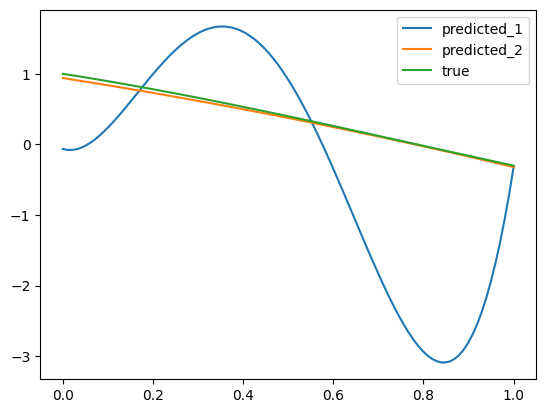

In [26]:
plt.plot(x_r, y_p, label="predicted_1")
plt.plot(x_r, y_pp, label="predicted_2")
plt.plot(x_r, y_t, label="true")

plt.legend()